## Loan Application Status Prediction

## Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
df = pd.read_csv("Loan_Application.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are total 614 rows and 13 columns present in the data set.

and there are no null values present in the data set.

and there are 4 float dtype, 1 intezer dtype and 8 object dtype of data present in the dataset

## Exploratory Data Analysis

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

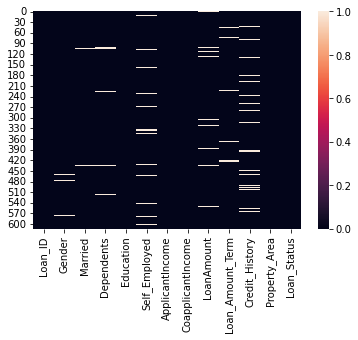

In [7]:
#To check missing values
sns.heatmap(df.isnull())

we have missing value in 7 columns out of 13. we will impute them in coming steps. 

For the variables which are object dtype, we will use mode to replce nan values and for numerical dtype , we will use mean to replace nan values

## Removing the Missing Values

In [8]:
from sklearn.impute import SimpleImputer

#For Object dtype columns
imp_O= SimpleImputer(strategy="most_frequent")
df["Gender"]= imp_O.fit_transform(df["Gender"].values.reshape(-1,1))
df["Married"]= imp_O.fit_transform(df["Married"].values.reshape(-1,1))
df["Dependents"]= imp_O.fit_transform(df["Dependents"].values.reshape(-1,1))
df["Self_Employed"]= imp_O.fit_transform(df["Self_Employed"].values.reshape(-1,1))

#For float dtype
imp_N= SimpleImputer(strategy="mean")
df["LoanAmount"]= imp_N.fit_transform(df["LoanAmount"].values.reshape(-1,1))
df["Loan_Amount_Term"]= imp_N.fit_transform(df["Loan_Amount_Term"].values.reshape(-1,1))
df["Credit_History"]= imp_N.fit_transform(df["Credit_History"].values.reshape(-1,1))

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [10]:
#Again checking the null values

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we can see there are no null values in the data frame.

## Statistics Summary

In [11]:
# For all numerical variables
df.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Key Observations:

The mean is more than median(50th percentile) in ApplicantIncome, CoapplicantIncome and LoanAmount.
wherever Mean value is higher than the median value, that data is skewed data. Also they have huge variance in their data.


Also there is a large difference between 75% and max value in these three columns.


The 1 and 2 observations suggest that there are extreme outliers present in these three columns.


Also standard deviation is very high in these three columns. So data is spreaded in more area.


Minimum co applicant income is 0 till 25th percentile.


Credit history is in binary column with 0 and 1 values. assuming that credit history 1 is good and 0 is not good
Loan_Amount_term is the year of loan, min is 1 year and maximum is 40.

In [12]:
# For all categorical variables
df.select_dtypes(include="object").describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


Count of Male applying loan is higher than female. 65% people are married who appiled for loan, 79% people are graduate and 38% people belong to semiurban area. 68% applicants applications are accepted.

In [13]:
#Let us see how credit history affects the Loan_Status of each of the applicants
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
0.8421985815602837,13,37,50
1.0,97,378,475
All,192,422,614


We can see that the applicants with Credit_History 1 are more eligible for the loan than the one who have Credit_History =0

In [15]:
df.groupby(["Gender","Self_Employed","Property_Area","Loan_Status"])["Loan_Status"].count()

Gender  Self_Employed  Property_Area  Loan_Status
Female  No             Rural          N                8
                                      Y               13
                       Semiurban      N               10
                                      Y               37
                       Urban          N               13
                                      Y               16
        Yes            Rural          N                2
                                      Y                1
                       Semiurban      N                3
                                      Y                5
                       Urban          N                1
                                      Y                3
Male    No             Rural          N               52
                                      Y               80
                       Semiurban      N               37
                                      Y              117
                       Urban          

### Univariate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


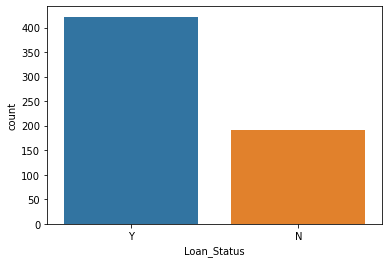

In [16]:
#Checking the target column
# Finding the number of People who got loan
sns.countplot(df['Loan_Status'])
print(df['Loan_Status'].value_counts())

Here we can see that out of 641 people, 422 people have got loan which is around 65.8% and 192 didn't got loan.

Also Here we can see there is huge difference between two Categories of Loan_Status. So the data is imbalanced. 

So we will apply SMOTE analysis before ML of final model.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

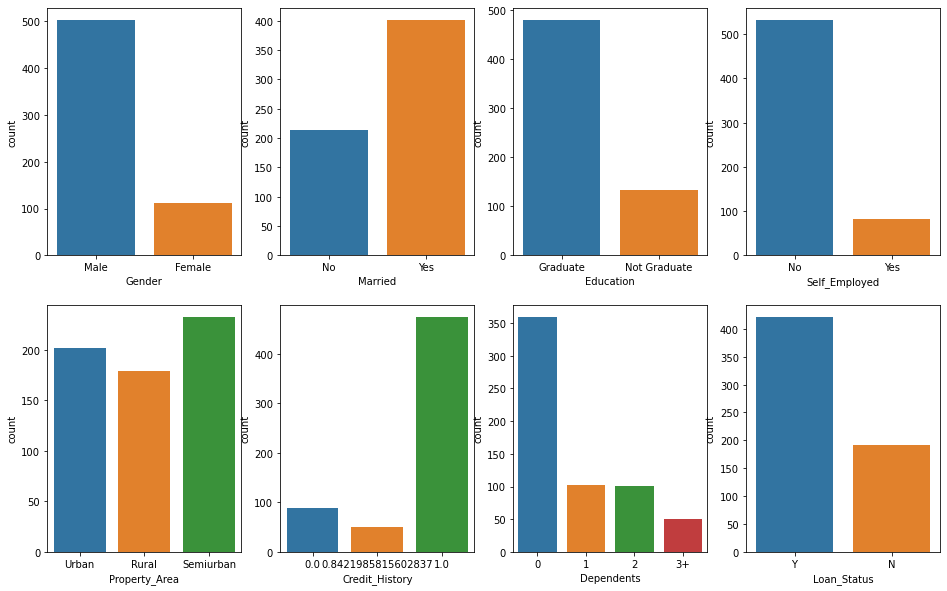

In [17]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot('Gender',data=df,ax=ax[0][0])
sns.countplot('Married',data=df,ax=ax[0][1])
sns.countplot('Education',data=df,ax=ax[0][2])
sns.countplot('Self_Employed',data=df,ax=ax[0][3])
sns.countplot('Property_Area',data=df,ax=ax[1][0])
sns.countplot('Credit_History',data=df,ax=ax[1][1])
sns.countplot('Dependents',data=df,ax=ax[1][2])
sns.countplot('Loan_Status',data=df,ax=ax[1][3])

OBSERVATIONS:

More Loans are approved Vs Rejected

Count of Male applicants is more than Female

Count of Married applicant is more than Non-married

Count of graduate is more than non-Graduate

Count of self-employed is less than that of Non-Self-employed

Maximum properties are located in Semiurban areas

Credit History is present for many applicants

The count of applicants with several dependents=0 is maximum.

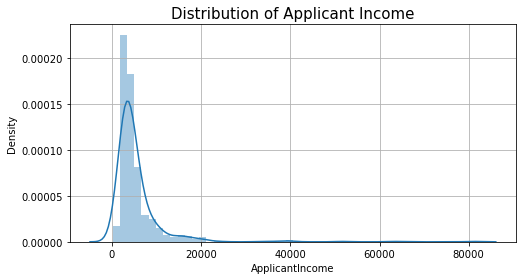

In [18]:
plt.rcParams["figure.figsize"] =(8,4)
sns.distplot(df["ApplicantIncome"])
plt.title("Distribution of Applicant Income", fontsize=15)
plt.grid()
plt.show()

## Bivariate Analysis

<AxesSubplot:xlabel='Gender,Loan_Status'>

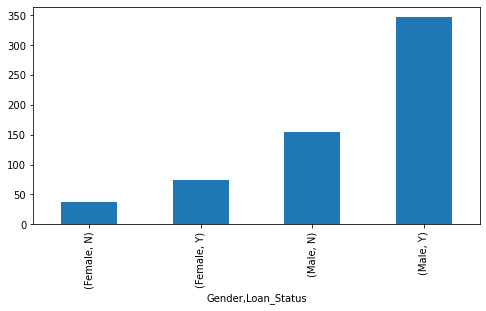

In [20]:
df.groupby(["Gender","Loan_Status"])["Loan_Status"].count().plot(kind = "bar")

we can see that maximum loan is applied by the males and accordingly more male members got their loan sanctioned.

<AxesSubplot:xlabel='Loan_Status,Gender,Education,Credit_History'>

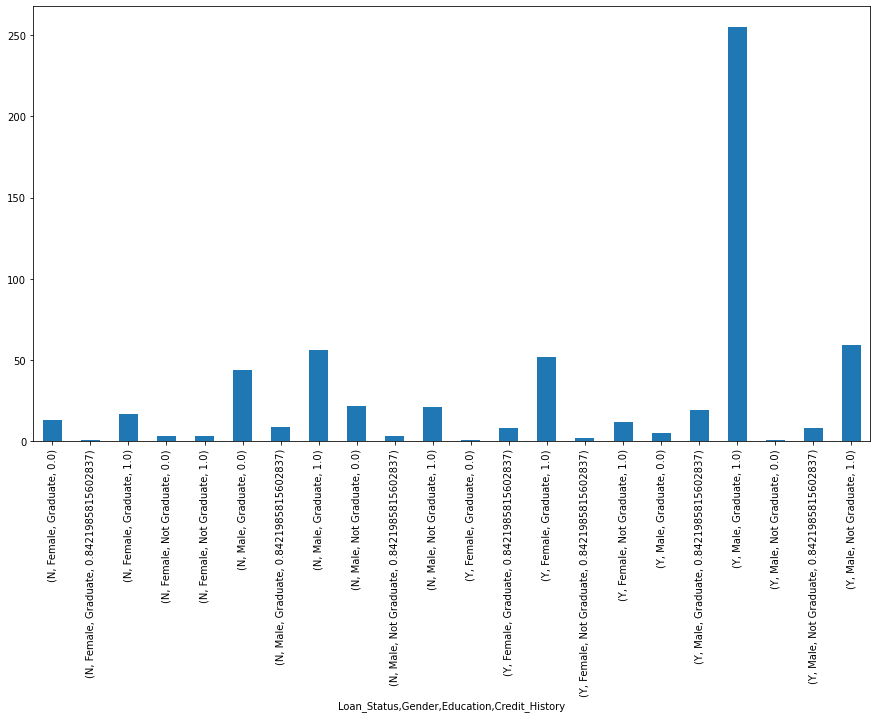

In [21]:
plt.figure(figsize=(15,8))
df.groupby(["Loan_Status","Gender","Education","Credit_History"])["Loan_Status"].count().plot(kind = "bar")

Maximum participation has been come from the people who are graduated. We can clearly see that graduated people with good credit history have higher loan application. It seems that graduate are earning more.

## Data visualisation of Numerical Features

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

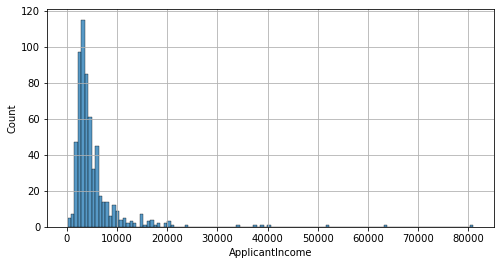

In [22]:
plt.grid()
sns.histplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

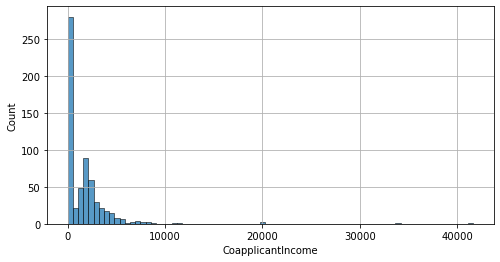

In [23]:
plt.grid()
sns.histplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

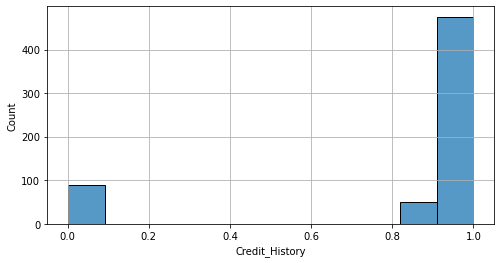

In [24]:
plt.grid()
sns.histplot(df['Credit_History'])

In [25]:
df.groupby("Education")["ApplicantIncome"].mean()

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

In [26]:
df.groupby(["Education","Dependents"])[["ApplicantIncome","CoapplicantIncome","LoanAmount"]].mean()

ApplicantIncome  CoapplicantIncome  LoanAmount
Education    Dependents                                                
Graduate     0               5200.234266        1696.315105  141.098327
             1               6562.333333        1332.987654  163.706623
             2               5360.597403        1781.516883  160.088628
             3+             10555.166667        2613.694444  219.250000
Not Graduate 0               3879.162162        1232.040541  116.273466
             1               3647.761905        1785.904762  136.686293
             2               3534.958333        1384.791667  118.100507
             3+              3843.733333         609.800000  116.921622

It is clearly observed that the graduates are earning more than non graduates. 

Average income along with dependants in graduate category is higher than that of the non graduates. 

With 3+ dependents loan amount is high under gradate bucket.

however under non graduate bucket it is 115 and the strange thing is that with 3+ dependents loan amount is equal as no dependance.

In [27]:
df.groupby(["Self_Employed","Gender"])[["ApplicantIncome", "LoanAmount"]].mean()

ApplicantIncome  LoanAmount
Self_Employed Gender                             
No            Female      3966.257732  120.781694
              Male        5351.195402  147.480475
Yes           Female      9022.800000  168.894144
              Male        7013.208955  171.549617

self_employed female are earning more than male, it seems they are good enterprenuer but average loan amount is high for male.


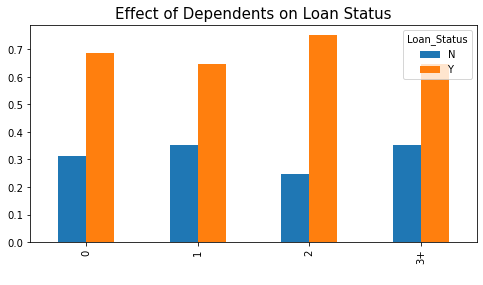

In [28]:
plt.rcParams['figure.figsize'] = (8,4)
x = pd.crosstab(df['Dependents'], df['Loan_Status'])
colors = plt.cm.magma(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Dependents on Loan Status', fontsize = 15)
plt.xlabel(' ')
plt.show()

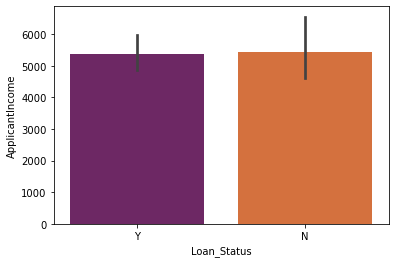

In [29]:
#Loan_Status vs ApplicantIncome
plt.figure(figsize=(6,4))
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df,palette='inferno')
plt.show()

Mean Applicant Income of Yes and No are almost the same

<AxesSubplot:>

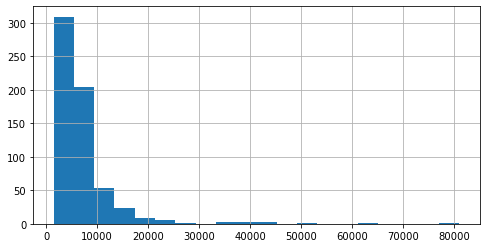

In [30]:
#Create a new column as Total Income

df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'] 
#Histogram for Total Income
df['TotalIncome'].hist(bins=20) 

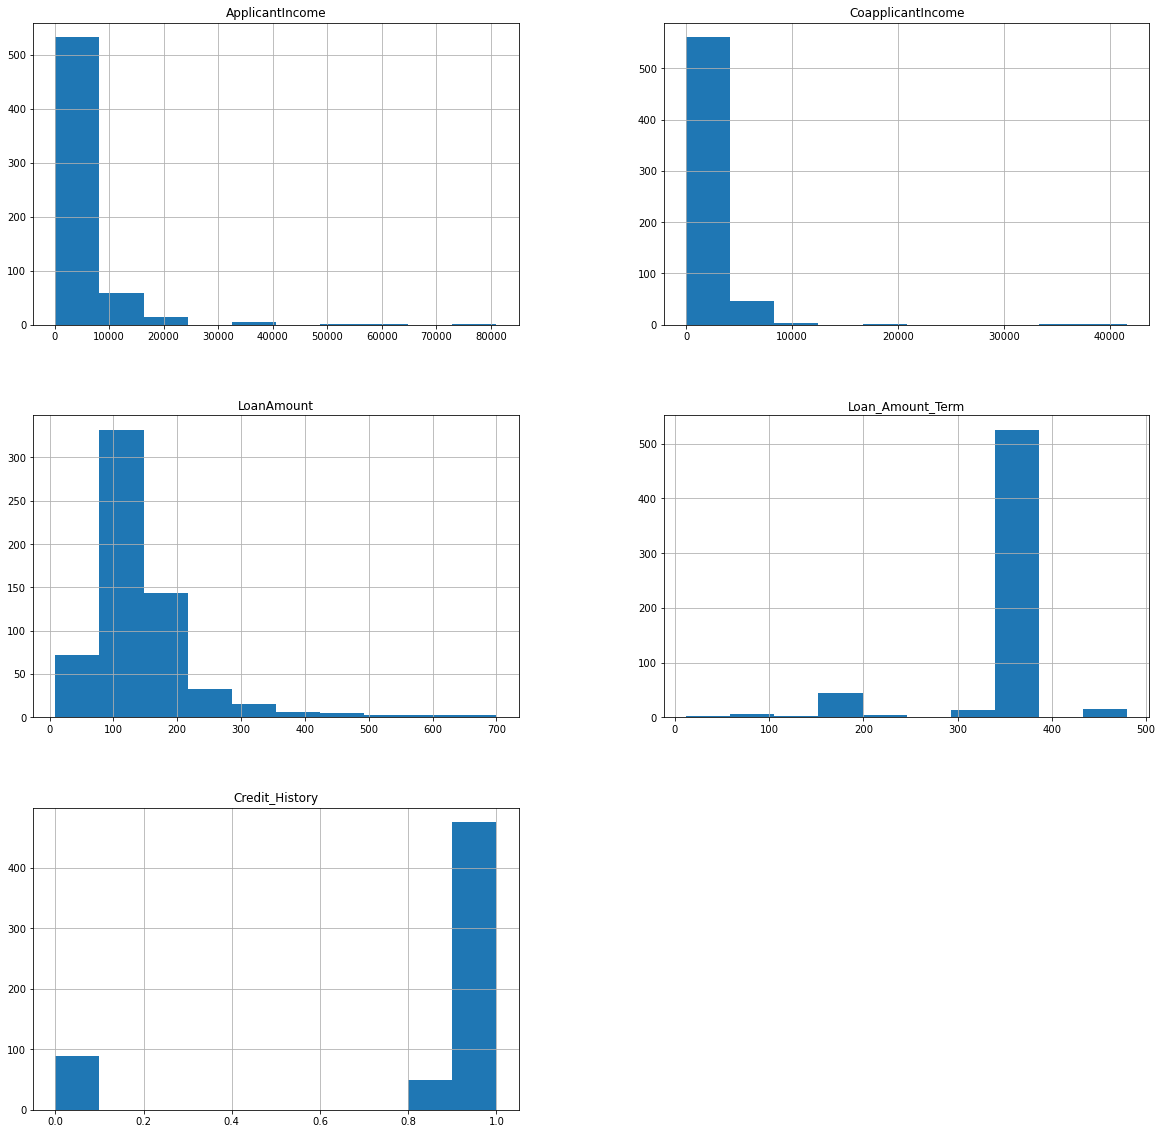

In [31]:
# distribution of the data
df.iloc[:,1:-1].hist(figsize=(20,20));

### To Check and remove the outliers and skewness

In [32]:
num_col = df.select_dtypes(exclude = "object")
num_col


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
0,5849,0.0,146.412162,360.0,1.0,5849.0
1,4583,1508.0,128.000000,360.0,1.0,6091.0
2,3000,0.0,66.000000,360.0,1.0,3000.0
3,2583,2358.0,120.000000,360.0,1.0,4941.0
4,6000,0.0,141.000000,360.0,1.0,6000.0
...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,2900.0
610,4106,0.0,40.000000,180.0,1.0,4106.0
611,8072,240.0,253.000000,360.0,1.0,8312.0
612,7583,0.0,187.000000,360.0,1.0,7583.0


In [33]:
def numeric_col_graph(x,variable):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(x[variable])
    
    plt.subplot(122)
    sns.boxplot(x[variable])
    plt.show();

In [34]:
def outlier_treatment(x,variable):
    Q1 = x[variable].quantile(.25)
    Q3 = x[variable].quantile(.75)
    
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    x[variable] = np.where(x[variable]> upper_bound,upper_bound , np.where(x[variable] < lower_bound,lower_bound, x[variable]))

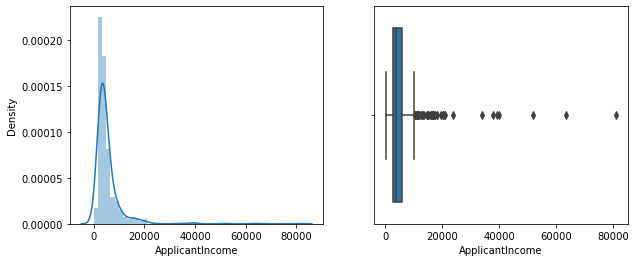

In [35]:
numeric_col_graph(df,"ApplicantIncome")

Applicant income with right skewed and have lot of extreme values. so let's cap them with IQR method because we have less data point and dropping them we will lose information

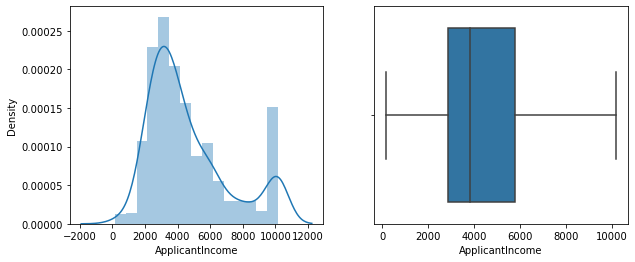

In [36]:
outlier_treatment(df,"ApplicantIncome")
numeric_col_graph(df,"ApplicantIncome")

Now it looks better and close to normal distribution and we have not outlier in this column.

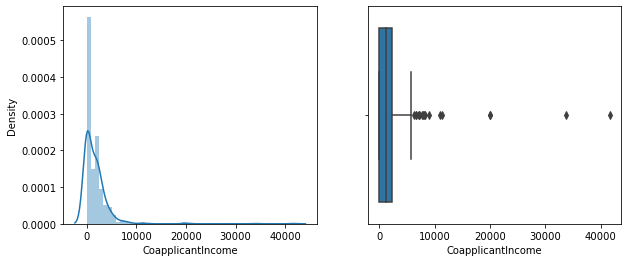

In [37]:
numeric_col_graph(df,"CoapplicantIncome")

In Coapplicant we observe that data is right skewed and outlier also present

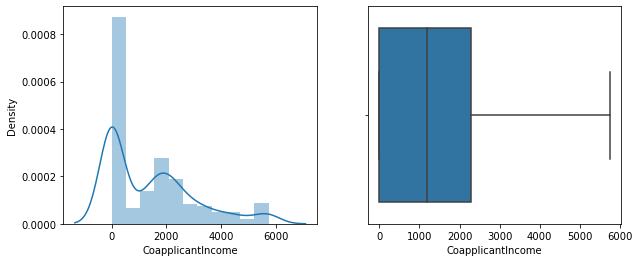

In [38]:
outlier_treatment(df,"CoapplicantIncome")
numeric_col_graph(df,"CoapplicantIncome")

All the extreme values have been capped with upper limit but we see high variability in the dataset range

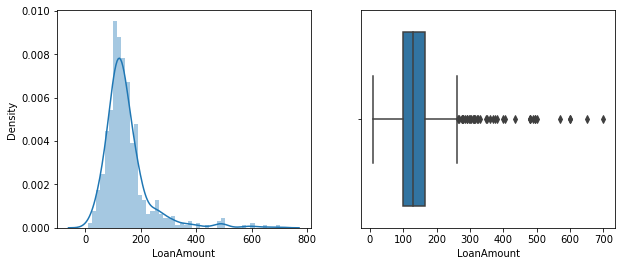

In [39]:
numeric_col_graph(df,"LoanAmount")

We see that loan amount is high is some of the cases which are resulted in outlier.

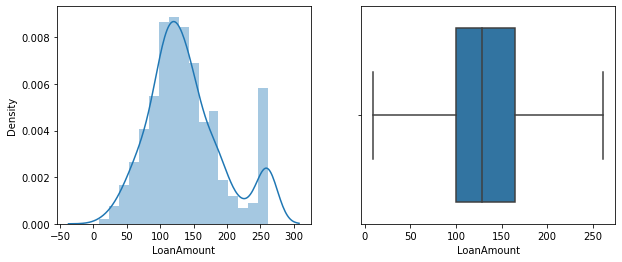

In [40]:
outlier_treatment(df,"LoanAmount")
numeric_col_graph(df,"LoanAmount")

Now it has come closer to normal distribution and no there are no extreme values, Numeric columns outliers have been handled with IQR method, we can see that these are now more close to normal distribution.

### Removing Skewness

In [41]:
df.select_dtypes(exclude = "object").skew()

ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           0.648627
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
TotalIncome          5.633449
dtype: float64

In [42]:
# Correcitng the  skewness from the dataset
df["ApplicantIncome"] = np.sqrt(df["ApplicantIncome"])
df["CoapplicantIncome"] = np.sqrt(df["CoapplicantIncome"]) 
df["LoanAmount"] = np.sqrt(df["LoanAmount"])
df["TotalIncome"] = np.sqrt(df["TotalIncome"])

In [43]:
df.select_dtypes(exclude = "object").skew()

ApplicantIncome      0.540741
CoapplicantIncome    0.192830
LoanAmount           0.029092
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
TotalIncome          2.816326
dtype: float64

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,0,0,0,0,376,0,100,9,2,2,1,320
1,1,1,1,1,0,0,306,60,81,9,2,0,0,333
2,2,1,1,0,0,1,139,0,26,9,2,2,1,42
3,3,1,1,0,1,0,90,160,73,9,2,2,1,238
4,4,1,0,0,0,0,381,0,94,9,2,2,1,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,9,2,0,1,31
610,610,1,1,3,0,0,275,0,7,5,2,0,1,135
611,611,1,1,1,0,0,431,3,163,9,2,2,1,436
612,612,1,1,2,0,0,422,0,133,9,2,2,1,416


In [45]:
# Droping Loan_ID and TotalIncome because it is not adding any value to target columns.
df.drop("Loan_ID",axis =1,inplace = True)
df.drop("TotalIncome",axis =1,inplace = True)

In [46]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.074674,0.181782,0.155814,-0.069368,0.019882,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.008528,0.209416,0.188401,-0.087657,-0.005177,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.137256,-0.067042,0.155696,-0.094810,-0.029681,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.189613,-0.051748,-0.167962,-0.088487,-0.083070,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.196767,-0.036547,0.115582,-0.031174,-0.003643,-0.030860,-0.003700
ApplicantIncome,0.074674,0.008528,0.137256,-0.189613,0.196767,1.000000,-0.248819,0.512613,-0.016901,0.048620,-0.067048,-0.003352
CoapplicantIncome,0.181782,0.209416,-0.067042,-0.051748,-0.036547,-0.248819,1.000000,0.268674,-0.019557,-0.035498,-0.083574,0.009272
LoanAmount,0.155814,0.188401,0.155696,-0.167962,0.115582,0.512613,0.268674,1.000000,0.071258,-0.012651,-0.087042,-0.049819
Loan_Amount_Term,-0.069368,-0.087657,-0.094810,-0.088487,-0.031174,-0.016901,-0.019557,0.071258,1.000000,0.023971,-0.091598,0.002512
Credit_History,0.019882,-0.005177,-0.029681,-0.083070,-0.003643,0.048620,-0.035498,-0.012651,0.023971,1.000000,-0.009898,0.513319


<AxesSubplot:>

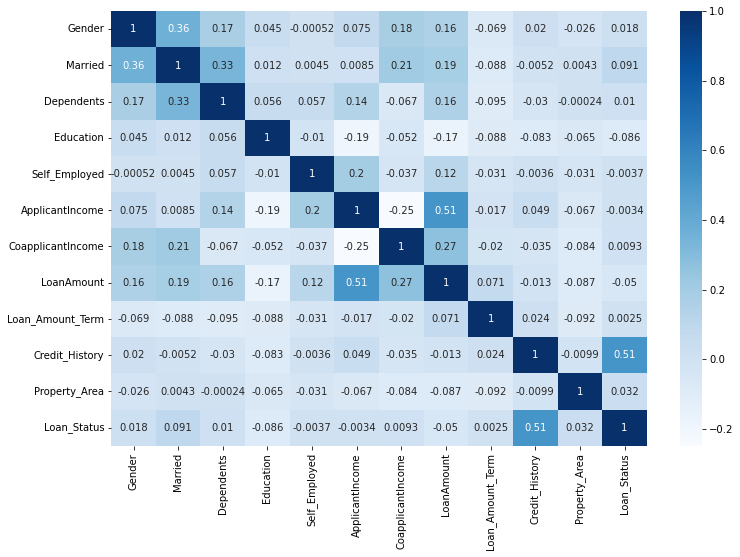

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

Observations:

There is no multicollinearity among the independent variables.

Education, Selfemployed, Loanamount and Applicatincome are negatively correlated with the target column.

We can see that Credit_History is highly correlated with Loan_status, means passing of loan highly depends on Credit history.

There is good relation between Applicantincome and loan amount.

## Applying SMOTE

In [48]:
X = df.drop("Loan_Status",axis = 1)
y = df["Loan_Status"]

In [49]:
#Balancing data by applying SMOTE.
from imblearn.over_sampling import SMOTE
smt=SMOTE()
sm_x,sm_y=smt.fit_resample(X,y)
#y.value_counts()
sm_y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
sm_x=scale.fit_transform(sm_x)
sm_x

array([[ 0.54448781, -1.14005593, -0.68217398, ...,  0.37938103,
         0.72204879,  1.38356728],
       [ 0.54448781,  0.87714995,  0.38010432, ...,  0.37938103,
         0.72204879, -1.18005684],
       [ 0.54448781,  0.87714995, -0.68217398, ...,  0.37938103,
         0.72204879,  1.38356728],
       ...,
       [ 0.54448781,  0.87714995, -0.68217398, ...,  0.37938103,
        -0.46127   ,  0.10175522],
       [ 0.54448781, -1.14005593, -0.68217398, ...,  0.37938103,
        -1.64458879,  0.10175522],
       [ 0.54448781, -1.14005593, -0.68217398, ...,  0.37938103,
        -1.64458879, -1.18005684]])

In [51]:
sm_y

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

## Creating Model

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Finding Best Random State

In [53]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(sm_x,sm_y,random_state=i,test_size=0.20)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best score is',maxAcc,'on Random State',maxRS)

Best score is 0.8461538461538461 on Random State 18


In [54]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sm_x,sm_y,random_state=18,test_size=0.20)

In [55]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(675, 11) 	 (169, 11)


In [56]:
print(y_train.shape,'\t',y_test.shape)

(675,) 	 (169,)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [59]:
pred=lg.predict(x_test)
print(pred)

[1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0]


In [60]:
print('accuracy_score:' , accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score: 0.8461538461538461
[[61 12]
 [14 82]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        73
           1       0.87      0.85      0.86        96

    accuracy                           0.85       169
   macro avg       0.84      0.84      0.84       169
weighted avg       0.85      0.85      0.85       169



### Checking with different algorithms

In [61]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8461538461538461
[[61 12]
 [14 82]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        73
           1       0.87      0.85      0.86        96

    accuracy                           0.85       169
   macro avg       0.84      0.84      0.84       169
weighted avg       0.85      0.85      0.85       169



Accuracy score of GaussianNB() is:
0.8284023668639053
[[60 13]
 [16 80]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        73
           1       0.86      0.83      0.85        96

    accuracy                           0.83       169
   macro avg       0.82      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169



Accuracy score of SVC() is:
0.8402366863905325
[[60 13]
 [14 82]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        73
           1 

We are getting highest accuracy with logistic Regression

### Let's Use Ensemble Technique to boostup score

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=18,criterion='gini')
#RandomForestClassifier(100)---Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8579881656804734
[[65  8]
 [16 80]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        73
           1       0.91      0.83      0.87        96

    accuracy                           0.86       169
   macro avg       0.86      0.86      0.86       169
weighted avg       0.86      0.86      0.86       169



In [63]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100,random_state=75,base_estimator=LogisticRegression(),algorithm='SAMME',learning_rate=0.01)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7988165680473372
[[60 13]
 [21 75]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        73
           1       0.85      0.78      0.82        96

    accuracy                           0.80       169
   macro avg       0.80      0.80      0.80       169
weighted avg       0.80      0.80      0.80       169



Random Forest Classifier is giving the better score than Logistic Regression. So Hypertuning Random Forest Classifier

## HyperTuning Parameter

In [64]:
RF = RandomForestClassifier() # Randomforest instance
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {
        "criterion":["gini","entropy"],
        "max_features" : ["auto", "sqrt", "log2"],
        "min_samples_split" :[2,4,6,8], 
        "max_depth" :[2,3,4,5],
        "min_samples_leaf":[3,5,8,10],
        "max_samples" :[0.2,0.3,0.4,0.5]
}

grid = RandomizedSearchCV(RF, para, scoring= "accuracy" )

grid.fit(x_train,y_train)
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x_test) # predicting with best parameters

score 0.7807407407407407
best parameter {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_samples': 0.3, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'gini'}
best estimator RandomForestClassifier(max_depth=4, max_features='log2', max_samples=0.3,
                       min_samples_leaf=3, min_samples_split=4)


### Cross Validation

In [65]:
best_parameter_RF = RandomForestClassifier(min_samples_split=6, min_samples_leaf=3, max_samples=0.2, max_features='sqrt', max_depth=2, criterion='gini')

for i in range(2,7):
    cv = cross_val_score(best_parameter_RF,sm_x,sm_y,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.7535545023696683 and the SD is 0.028436018957345932
at CV 3 The mean is  0.7773402993362106 and the SD is 0.0531833676064691
at CV 4 The mean is  0.7630331753554502 and the SD is 0.06314176585058875
at CV 5 The mean is  0.778486897717667 and the SD is 0.04723232841304609
at CV 6 The mean is  0.7714454576156705 and the SD is 0.07031569909066318


Observation

Since Randomforest worked well out of all other model, so we have done the hyperparameter tuning to set the best parameter for final model. 

Now i have checked the best CV as well that at level of CV is generated the best score and we have found CV 6 is at best

In [66]:
# Cross validate of RandomForestClassifier using cv=6
from sklearn.model_selection import cross_val_score
score=cross_val_score(RF,sm_x,sm_y,cv=6,scoring='accuracy')
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

Score: [0.75886525 0.75177305 0.75886525 0.89361702 0.82857143 0.92857143]
Mean Score: 0.8200439040864572
Standard Deviation: 0.07001251227389886


## AUC ROC Curve

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [68]:
grid.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [0.2, 0.3, 0.4, 0.5],
                                        'min_samples_leaf': [3, 5, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8]},
                   scoring='accuracy')

In [69]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.85      , 0.26      , 0.65      , 0.83      , 0.79083333,
       0.1       , 0.47      , 0.58      , 0.22      , 0.71      ,
       0.05      , 0.48      , 0.03      , 0.12      , 0.84      ,
       0.96      , 0.06      , 0.59      , 0.87      , 0.04      ,
       0.71      , 0.08      , 0.62833333, 0.76      , 0.06      ,
       0.73      , 0.58      , 0.67      , 0.02      , 0.06      ,
       0.96      , 0.75      , 0.02      , 0.92      , 0.78      ,
       0.75      , 0.68      , 0.01      , 0.14      , 0.75      ,
       0.34      , 0.1       , 0.12      , 0.87      , 0.94      ,
       0.39      , 0.03      , 0.58      , 0.28      , 0.86      ,
       0.09      , 0.14      , 0.12      , 0.14      , 0.94      ,
       0.02      , 0.6       , 0.88      , 0.60833333, 0.92      ,
       0.32      , 0.45      , 0.96      , 0.74      , 0.9       ,
       0.15      , 0.96      , 0.87      , 0.37      , 0.56      ,
       0.08      , 0.96      , 0.36      , 0.17      , 0.5    

In [70]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [71]:

fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01369863, 0.01369863, 0.02739726,
        0.02739726, 0.02739726, 0.04109589, 0.05479452, 0.05479452,
        0.05479452, 0.05479452, 0.05479452, 0.05479452, 0.05479452,
        0.05479452, 0.06849315, 0.06849315, 0.08219178, 0.08219178,
        0.09589041, 0.09589041, 0.09589041, 0.10958904, 0.10958904,
        0.12328767, 0.12328767, 0.12328767, 0.12328767, 0.1369863 ,
        0.15068493, 0.17808219, 0.17808219, 0.19178082, 0.21917808,
        0.21917808, 0.23287671, 0.28767123, 0.28767123, 0.31506849,
        0.34246575, 0.38356164, 0.4109589 , 0.49315068, 0.53424658,
        0.5890411 , 0.67123288, 0.68493151, 0.73972603, 0.78082192,
        0.80821918, 0.89041096, 0.94520548, 0.98630137, 1.        ]),
 array([0.        , 0.01041667, 0.02083333, 0.07291667, 0.11458333,
        0.125     , 0.14583333, 0.15625   , 0.

In [72]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

0.8618721461187215


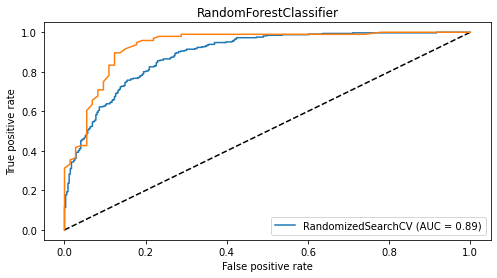

In [73]:
plot_roc_curve(grid,x_train,y_train)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

### Model Saving

In [74]:
import pickle
filename='Predicted_Loan_Status.pkl'
pickle.dump(rf,open(filename,'wb'))